# Intuit Quickbooks Upgrade

* Team-lead GitHub userid: rsm-xyz123
* Group name: Group_19
* Team member names:
    - Minqi Chen
    - Sameen Su
    - Divyamsi Kunapareddy
    - Maggie Chen

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
import seaborn as sns

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [2]:
rsm.__version__

'0.9.14'

In [3]:
rsm.__file__

'/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/__init__.py'

In [4]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_parquet("data/intuit75k.parquet")
intuit75k["res1_yes"] = rsm.ifelse(intuit75k.res1 == "Yes", 1, 0)
intuit75k.describe()

id      zip_bins       bizflag       numords       dollars  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean   37500.500000     10.498333      0.245080      2.076280     93.087133   
std    21650.779432      5.765751      0.430137      1.241355     81.205900   
min        1.000000      1.000000      0.000000      1.000000      1.000000   
25%    18750.750000      5.000000      0.000000      1.000000     37.000000   
50%    37500.500000     10.000000      0.000000      2.000000     71.000000   
75%    56250.250000     15.000000      0.000000      3.000000    124.500000   
max    75000.000000     20.000000      1.000000      5.000000   1149.000000   

               last    sincepurch     version1    owntaxprod      upgraded  \
count  75000.000000  75000.000000  75000.00000  75000.000000  75000.000000   
mean      15.838427     15.657173      0.21400      0.028693      0.208387   
std        9.539057     10.026312      0.41013      0.166944      0.406157   
min        1.000000      1.000000      0.00000      0.000000      0.000000   
25%        8.000000      7.000000      0.00000      0.000000      0.000000   
50%       15.000000     14.000000      0.00000      0.000000      0.000000   
75%       24.000000     24.000000      0.00000      0.000000      0.000000   
max       36.000000     36.000000      1.00000      1.000000      1.000000   

           training      res1_yes  
count  75000.000000  75000.000000  
mean       0.700000      0.048013  
std        0.458261      0.213796  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000

In [5]:
# check the number of training and test observations
intuit75k['training'].value_counts()

training
1    52500
0    22500
Name: count, dtype: int64

In [6]:
# check the number of yes and no responses
intuit75k['res1'].value_counts()

res1
No     71399
Yes     3601
Name: count, dtype: int64

In [7]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

      index     OR     OR%   2.5%  97.5% p.values     
1   numords  1.352   35.2%  1.313  1.392   < .001  ***
2  version1  2.113  111.3%  1.911  2.335   < .001  ***
3  upgraded  2.628  162.8%  2.388  2.894   < .001  ***


/opt/conda/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [8]:
## Question answers
intuit75k.groupby('training')['id'].count()

training
0    22500
1    52500
Name: id, dtype: int64

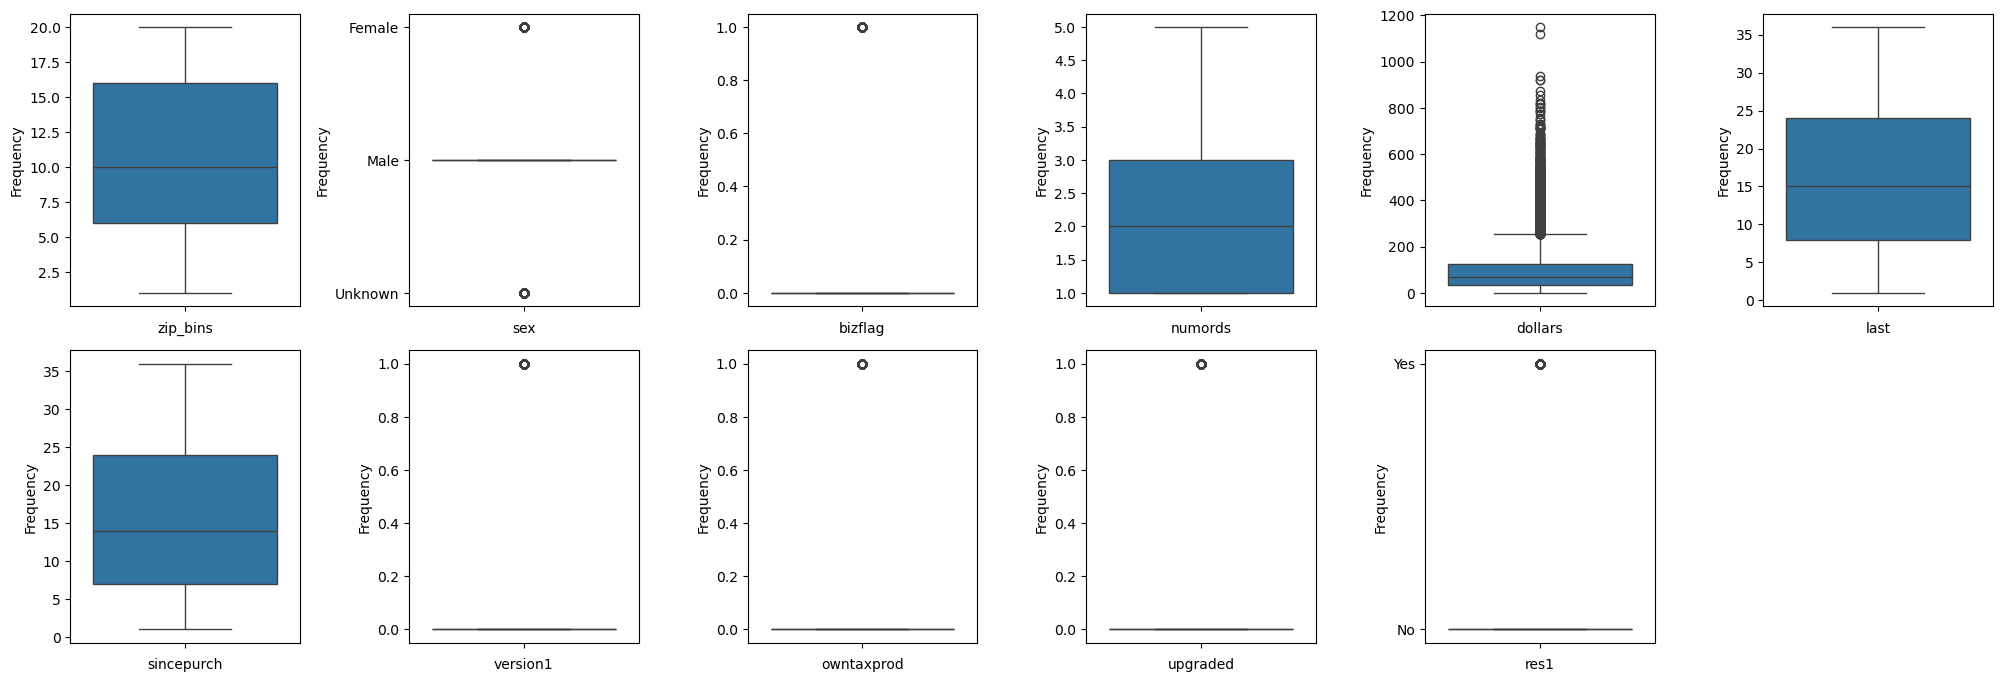

All the plot seem to be okay, except for the dollars column, with 95% of the data lying below 250$, and only 5% of the data above 250$.


In [9]:
k = 1
plt.figure(figsize=(20, 10)) 
for col in [ 'zip_bins', 'sex', 'bizflag', 'numords', 'dollars', 'last', 'sincepurch', 'version1', 'owntaxprod', 'upgraded', 'res1']:
    ax = plt.subplot(3, 6, k)
    sns.boxplot(intuit75k[intuit75k['training'] == 1][col],   ax= ax)  # Adjust bins for better resolution if necessary
    plt.xlabel(col)
    plt.ylabel('Frequency')
    k = k+1
 
plt.tight_layout() 
plt.show()


print("All the plot seem to be okay, except for the dollars column, with 95% of the data lying below 250$, and only 5% of the data above 250$.")


based on the below graph, we can observe that, most of the business who responded belong to the first zip_bin.


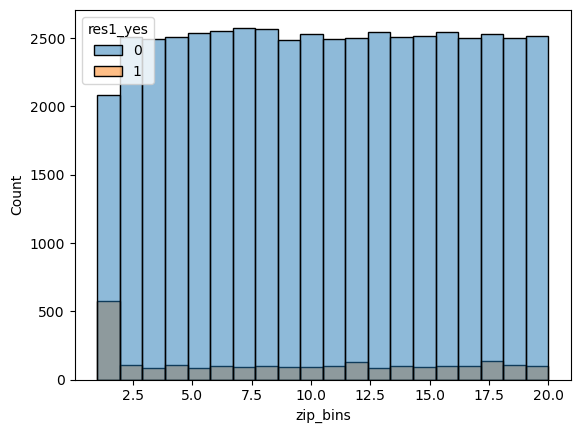

In [10]:
#sns.histplot(intuit75k[(intuit75k['training']==1)  ]['zip_bins'], hue= 'res1_yes') 
sns.histplot(data=intuit75k[intuit75k['training']==1], x='zip_bins', hue='res1_yes', bins =20)

print("based on the below graph, we can observe that, most of the business who responded belong to the first zip_bin.")

As the sex column has Female, Male and Unknown values, we convert it to a categorical variable. 
Converting zip_bins to variable by classification if the business belongs to the first zip code or not.

In [11]:
# one hot encode sex column
from sklearn.preprocessing import OneHotEncoder

data = intuit75k.copy()

encoder = OneHotEncoder(sparse=False, drop='first')
sex_encoded = encoder.fit_transform(data[['sex']])

sex_feature_names = ['sex_' + category for category in encoder.categories_[0][1:]]
sex_encoded_df = pd.DataFrame(sex_encoded, columns=sex_feature_names)

data = pd.concat([data.reset_index(drop=True), sex_encoded_df.reset_index(drop=True)], axis=1)
data.drop('sex', axis=1, inplace=True)


data['zip_cat'] = np.where(intuit75k['zip_bins'] == 1, 1,0)
data.head()

/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


id   zip5  zip_bins  bizflag  numords  dollars  last  sincepurch  version1  \
0   1  94553        18        0        2    109.5     5          12         0   
1   2  53190        10        0        1     69.5     4           3         0   
2   3  37091         8        0        4     93.0    14          29         0   
3   4  02125         1        0        1     22.0    17           1         0   
4   5  60201        11        0        1     24.5     2           3         0   

   owntaxprod  upgraded res1  training  res1_yes  sex_Male  sex_Unknown  \
0           0         0   No         1         0       1.0          0.0   
1           0         0   No         0         0       0.0          1.0   
2           0         1   No         0         0       1.0          0.0   
3           0         0   No         1         0       1.0          0.0   
4           0         0   No         0         0       1.0          0.0   

   zip_cat  
0        0  
1        0  
2        0  
3        1  
4        0

We standardize the zip_bins, numords, dollars, last, sincepurch columns individually for the training set and test set, and then convert them to a dataframe.

In [12]:
# Filter for the training set and non-responders
train = data[(data['training'] == 1)]

# Selecting features and target variable for the training data
train = train.drop(columns=['zip5', 'res1', 'id', 'training','zip_bins'])  # Also drop 'training'

### Lasso Regression

We Create a logistic regression model with L1 regularization (Lasso) using the training set.

In [13]:
# Creating the logistic regression model with L1 regularization
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

print(train.columns)
X_train = train.drop(columns=['res1_yes'])
y_train = train['res1_yes']

model.fit(X_train, y_train)
coefficients = model.coef_[0]
print(coefficients)

feature_names = X_train.columns
# Selected features are those with non-zero coefficients
selected_features = feature_names[coefficients != 0]
print("Original features:", feature_names)
print("Selected features:", selected_features)

Index(['bizflag', 'numords', 'dollars', 'last', 'sincepurch', 'version1',
       'owntaxprod', 'upgraded', 'res1_yes', 'sex_Male', 'sex_Unknown',
       'zip_cat'],
      dtype='object')
[ 3.48895501e-02  2.29064830e-01  1.08579494e-03 -4.38285490e-02
  2.31910214e-03  7.32638680e-01  2.91788711e-01  9.49176796e-01
 -2.06474765e-02 -3.15894953e-02  2.01834320e+00]
Original features: Index(['bizflag', 'numords', 'dollars', 'last', 'sincepurch', 'version1',
       'owntaxprod', 'upgraded', 'sex_Male', 'sex_Unknown', 'zip_cat'],
      dtype='object')
Selected features: Index(['bizflag', 'numords', 'dollars', 'last', 'sincepurch', 'version1',
       'owntaxprod', 'upgraded', 'sex_Male', 'sex_Unknown', 'zip_cat'],
      dtype='object')


We see that Lasso Regression failed to drop out any unnecessary features. Thus, we try other methods to hand-select features.

In [14]:
lr0 = rsm.model.logistic(
    {'Train': train},
    rvar='res1_yes',
    evar= selected_features
)
lr0.summary(vif=True)

Logistic regression (GLM)
Data                 : Train
Response variable    : res1_yes
Level                : None
Explanatory variables: bizflag, numords, dollars, last, sincepurch, version1, owntaxprod, upgraded, sex_Male, sex_Unknown, zip_cat
Null hyp.: There is no effect of x on res1_yes
Alt. hyp.: There is an effect of x on res1_yes

                OR     OR%  coefficient  std.error  z.value p.value     
Intercept    0.024  -97.6%        -3.74      0.083  -44.996  < .001  ***
bizflag      1.039    3.9%         0.04      0.049    0.775   0.439     
numords      1.259   25.9%         0.23      0.019   12.066  < .001  ***
dollars      1.001    0.1%         0.00      0.000    3.977  < .001  ***
last         0.957   -4.3%        -0.04      0.002  -18.080  < .001  ***
sincepurch   1.002    0.2%         0.00      0.004    0.505   0.614     
version1     2.103  110.3%         0.74      0.087    8.542  < .001  ***
owntaxprod   1.353   35.3%         0.30      0.103    2.940   0.003   **
up

Based on the output, we drop **all statistically insignificant features**: bizflag, sincepurch, sex_Male, sex_Unknown. And only keep the following selected_features.

In [15]:
selected_features = [ 'numords', 'dollars', 'last',  'version1',
       'owntaxprod', 'upgraded',  'zip_cat']

In [16]:
lr = rsm.model.logistic(
    {'Train': train},
    rvar='res1_yes',
    evar=selected_features
)
lr.summary(vif=True)

Logistic regression (GLM)
Data                 : Train
Response variable    : res1_yes
Level                : None
Explanatory variables: numords, dollars, last, version1, owntaxprod, upgraded, zip_cat
Null hyp.: There is no effect of x on res1_yes
Alt. hyp.: There is an effect of x on res1_yes

               OR     OR%  coefficient  std.error  z.value p.value     
Intercept   0.024  -97.6%        -3.73      0.064  -58.586  < .001  ***
numords     1.259   25.9%         0.23      0.019   12.060  < .001  ***
dollars     1.001    0.1%         0.00      0.000    3.991  < .001  ***
last        0.957   -4.3%        -0.04      0.002  -18.089  < .001  ***
version1    2.178  117.8%         0.78      0.053   14.785  < .001  ***
owntaxprod  1.354   35.4%         0.30      0.103    2.952   0.003   **
upgraded    2.702  170.2%         0.99      0.051   19.612  < .001  ***
zip_cat     7.558  655.8%         2.02      0.055   36.846  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0

We could see from the logistic model that all the selected variables are statistically significant, and we got a R-squared of 0.07 and a AUC of 0.708.

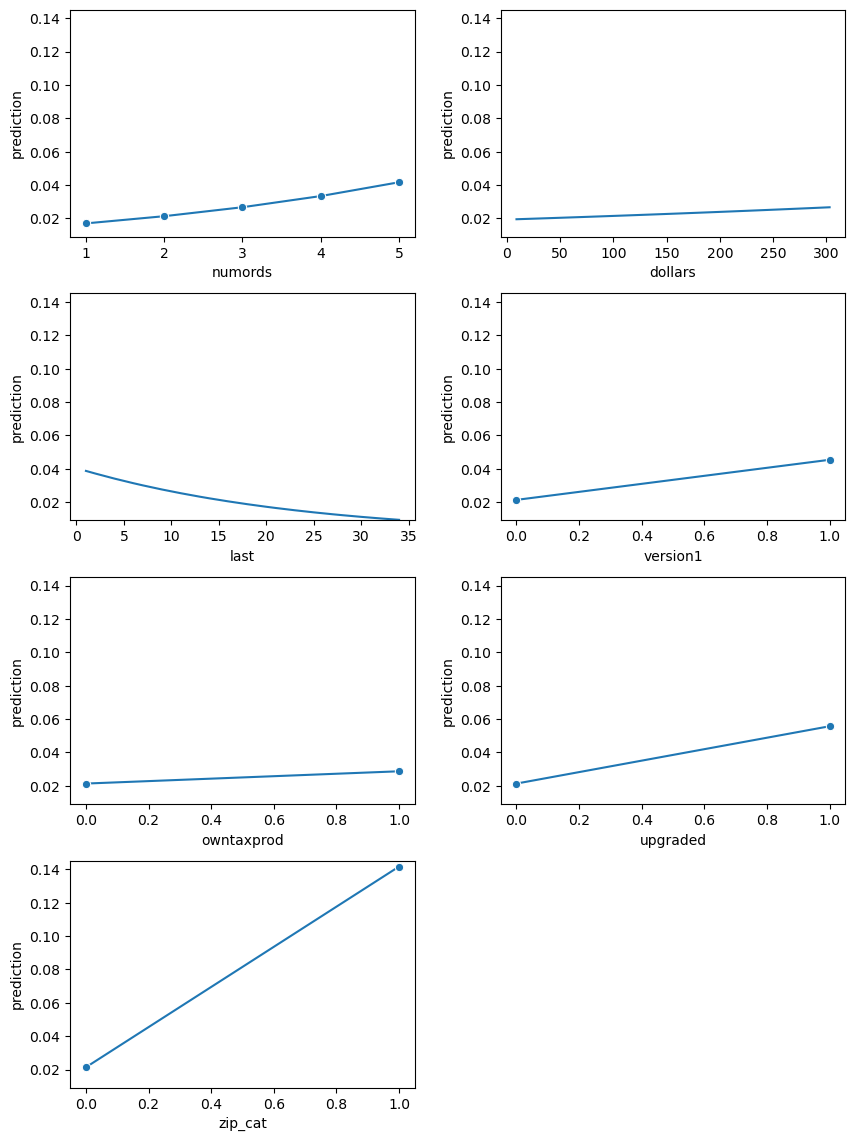

In [17]:
lr.plot('pred')

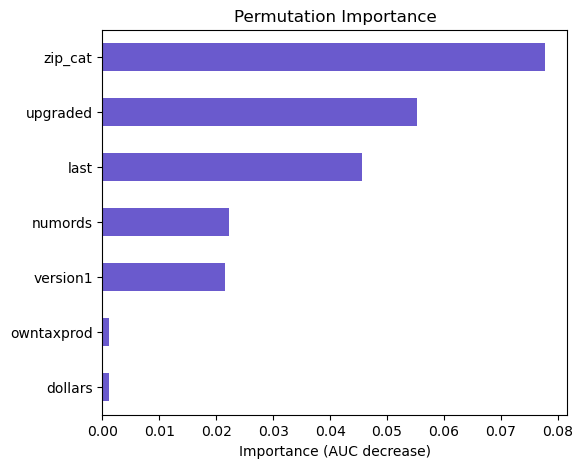

In [18]:
lr.plot('vimp')

Based on the prediction plots, we could see that numords, dollars, and last are all positively correlated with the probability of responing to the mailing. And whether the customer upgrade the version has the greatest impact on the probability of responding to the mailing.

And to predict whether they respond to the mailing or not, we calcuated the breakeven rate by using the each mail piece cost divided by the margin, which is 1.41/60 = 0.0235. If the probability of responding to the mailing is higher than 0.0235, we would send the mailing to the customer.

break_even:  0.0235
True Positives (TP): 980
True Negatives (TN): 7875
False Positives (FP): 13522
False Negatives (FN): 123
Profit :  38352.18
ROME :  1.8756121679474878


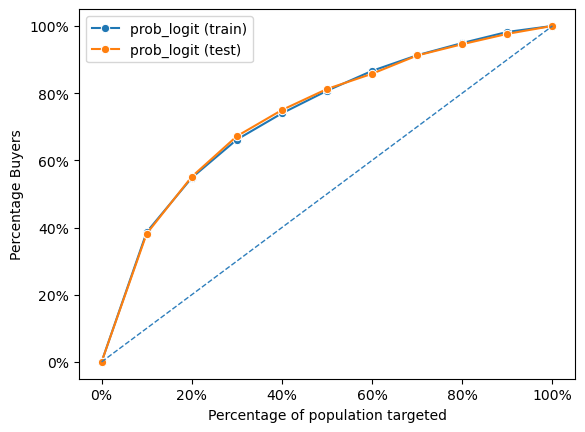

In [19]:
def profit_calc(test , column_name):
    break_even = 1.41/60
    print("break_even: ",break_even)
    y_pred_1 = np.where(test[column_name] > break_even, 1,0)
    
    TP = np.sum((test['res1_yes'] == 1) & (y_pred_1 == 1))
    TN = np.sum((test['res1_yes'] == 0) & (y_pred_1 == 0))
    FP = np.sum((test['res1_yes'] == 0) & (y_pred_1 == 1))
    FN = np.sum((test['res1_yes'] == 1) & (y_pred_1 == 0))
    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)
    print("Profit : ", TP*60 - (TP+FP)*1.41)
    print("ROME : ", (TP*60 - (TP+FP)*1.41)/((TP+FP)*1.41))

data['prob_logit'] = lr.predict(data)['prediction']
data['pred_logit'] = np.where(data['prob_logit'] >= (1.41/60),1,0)
# dct = {"train": data[data['training'] == 1], "test": data[data['training'] == 0]}
# fig = rsm.gains_plot(dct, "res1_yes", 1, "prob_logit")
data['prob_logit'] = lr.predict(data)['prediction']

profit_calc(data[data['training'] == 0], 'prob_logit')
dct = {"train": data[data['training'] == 1], "test": data[data['training'] == 0]}
fig = rsm.gains_plot(dct, "res1_yes", 1, "prob_logit")

Based on the plot we could see that the performance of the test set is very similar to the performance of the training set.

For the logistic regression model, we get a AUC of 0.754 and a profit of 38352.18 for the test set.

Then, we try adding the interaction terms to the model. We add the interaction term of numords and version1, we then fit the model and calculate the AUC and profit.

Logistic regression (GLM)
Data                 : Train
Response variable    : res1_yes
Level                : 1
Explanatory variables: numords, dollars, last, version1, owntaxprod, upgraded, zip_cat
Null hyp.: There is no effect of x on res1_yes
Alt. hyp.: There is an effect of x on res1_yes

                     OR     OR%  coefficient  std.error  z.value p.value     
Intercept         0.031  -96.9%        -3.48      0.067  -51.938  < .001  ***
numords           1.134   13.4%         0.13      0.022    5.721  < .001  ***
dollars           1.001    0.1%         0.00      0.000    4.079  < .001  ***
last              0.957   -4.3%        -0.04      0.002  -18.174  < .001  ***
version1          0.866  -13.4%        -0.14      0.107   -1.342   0.179     
owntaxprod        1.457   45.7%         0.38      0.103    3.656  < .001  ***
upgraded          2.679  167.9%         0.99      0.051   19.492  < .001  ***
zip_cat           7.713  671.3%         2.04      0.055   37.051  < .001  ***
numo

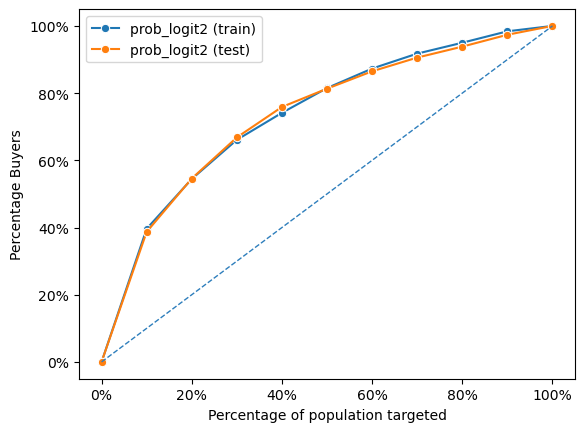

In [20]:
lr2 = rsm.model.logistic(
    {'Train': train},
    rvar = 'res1_yes',
    lev = 1,
    evar = selected_features,
    ivar = ['numords:version1']
)
print(lr2.summary(main=True))


data['prob_logit2'] = lr2.predict(data)['prediction']
data['pred_logit2'] = np.where(data['prob_logit2'] >= (1.41/60),1,0)


profit_calc(data[data['training'] == 0], 'prob_logit2')
dct = {"train": data[data['training'] == 1], "test": data[data['training'] == 0]}
fig = rsm.gains_plot(dct, "res1_yes", 1, "prob_logit2")

For this logistic model with interaction, we get a AUC of 0.757 and a profit of 38053.770000000004 for the test set.

# Neural Network

First, we try a simple neural network with one hidden layer and all the variables.

Multi-layer Perceptron (NN)
Data                 : train
Response variable    : res1_yes
Level                : 1
Explanatory variables: bizflag, numords, dollars, last, sincepurch, version1, owntaxprod, upgraded, sex_Male, sex_Unknown, zip_cat
Model type           : classification
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum itterations  : 10000
random_state         : 1234
AUC                  : 0.755

Raw data             :
 bizflag  numords  dollars  last  sincepurch  version1  owntaxprod  upgraded  sex_Male  sex_Unknown  zip_cat
       0        2    109.5     5          12         0           0         0       1.0          0.0        0
       0        1     22.0    17           1         0           0         0       1.0          0.0        1
       0        1     20.0    17          17         0           0         1       1.0          0.0        0

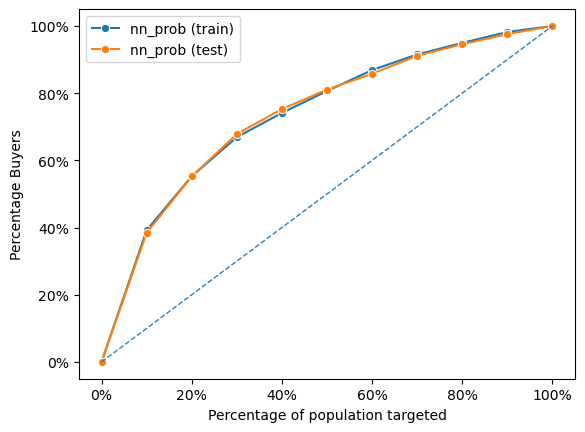

In [21]:
evar = ['bizflag', 'numords', 'dollars', 'last', 'sincepurch', 'version1',
       'owntaxprod', 'upgraded', 'sex_Male', 'sex_Unknown',
       'zip_cat']

clf1 = rsm.model.mlp(
    data = {'train': train},
    rvar = 'res1_yes',
    lev =1,
    evar = evar,
    hidden_layer_sizes = (1,),
    mod_type = 'classification'
)

clf1.summary()

data['nn_prob'] = clf1.predict(data)['prediction']
data['nn_pred'] = np.where(data['nn_prob'] >= (1.41/60),1,0)


profit_calc(data[data['training'] == 0], 'nn_pred')

dct = {"train": data[data['training'] == 1], "test": data[data['training'] == 0]}
fig = rsm.gains_plot(dct, "res1_yes", 1, "nn_prob")

We could see that the AUC for this model is 0.755, and the profit is 37563.81, which has a similar performance to the logistic regression model. And whether the customer upgrade the version has the greatest impact on the probability of responding to the mailing, which is also similar to the logistic model results.

Then, we set up a parameter grid for the neural network model and use GridSearchCV to find the best parameters.

In [28]:
X = data[data['training'] == 1][evar]
y = data[data['training'] == 1]['res1_yes']

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(1,),(10,),(10,20)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
scoring = {'AUC': 'roc_auc'}

# Create the MLPClassifier object
clf1 = MLPClassifier()

# Create a GridSearchCV object
clf = GridSearchCV(estimator=clf1, param_grid=parameter_space, scoring=scoring,
    refit='AUC',n_jobs=4, cv=5)

# Fit the GridSearchCV object to the data
clf.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=4,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(1,), (10,), (10, 20)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             refit='AUC', scoring={'AUC': 'roc_auc'})

In [38]:
pd.DataFrame(clf.cv_results_).sort_values("rank_test_AUC").head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9        1.398986      0.319746         0.006003        0.001143   
23       1.732464      0.331416         0.004665        0.000339   
31       1.078872      0.200934         0.002969        0.000032   
7        1.170893      0.256386         0.003340        0.000137   
5        1.137038      0.088350         0.003956        0.000479   

   param_activation param_alpha param_hidden_layer_sizes param_learning_rate  \
9              tanh      0.0001                 (10, 20)            constant   
23             tanh        0.05                 (10, 20)            adaptive   
31             relu      0.0001                    (10,)            adaptive   
7              tanh      0.0001                    (10,)            adaptive   
5              tanh      0.0001                    (10,)            constant   

   param_solver                                             params  \
9          adam  {'activation': 'tanh', 'alpha': 0.0001, 'hidde...   
23         adam  {'activation': 'tanh', 'alpha': 0.05, 'hidden_...   
31         adam  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   
7          adam  {'activation': 'tanh', 'alpha': 0.0001, 'hidde...   
5          adam  {'activation': 'tanh', 'alpha': 0.0001, 'hidde...   

    split0_test_AUC  split1_test_AUC  split2_test_AUC  split3_test_AUC  \
9          0.737355         0.750627         0.765266         0.751675   
23         0.736305         0.756607         0.764746         0.750123   
31         0.736409         0.762604         0.752747         0.747952   
7          0.733266         0.757201         0.766255         0.750906   
5          0.735975         0.754326         0.759370         0.748538   

    split4_test_AUC  mean_test_AUC  std_test_AUC  rank_test_AUC  
9          0.765781       0.754141      0.010578              1  
23         0.760391       0.753634      0.009906              2  
31         0.764818       0.752906      0.010322              3  
7          0.756719       0.752870      0.010963              4  
5          0.759926       0.751627      0.008839              5

Multi-layer Perceptron (NN)
Data                 : train
Response variable    : res1_yes
Level                : None
Explanatory variables: dollars, last, numords, version1, upgraded, zip_cat
Model type           : classification
Hidden_layer_sizes   : (10, 20)
Activation function  : identity
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 1e-05
Maximum itterations  : 10000
random_state         : 1234
AUC                  : 0.753

Raw data             :
 dollars  last  numords  version1  upgraded  zip_cat
   109.5     5        2         0         0        0
    22.0    17        1         0         0        1
    20.0    17        1         0         1        0
    24.5     4        1         1         0        0
    73.5    10        3         0         0        0

Estimation data      :
  dollars      last   numords  version1  upgraded  zip_cat
 0.207902 -1.137183 -0.057079         0         0        0
-0.873735  0.119783 

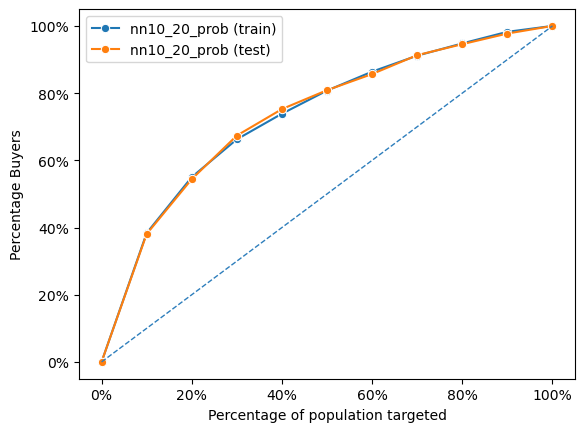

In [39]:
clf2 = rsm.model.mlp(
    data = {'train': train},
    rvar = 'res1_yes',
    evar = [  'dollars', 'last', 'numords', 'version1', 'upgraded',
       'zip_cat'],
    hidden_layer_sizes = (10,20),
    mod_type = 'classification',
    solver = 'lbfgs',
    alpha = 0.0001,
    activation = 'identity',
    learning_rate_init = 0.00001
)

clf2.summary()
data['nn10_20_prob'] = clf2.predict(data)['prediction']
data['nn10_20_pred'] = np.where(data['nn10_20_prob'] >= (1.41/60),1,0)

profit_calc(data[data['training']==0], 'nn10_20_prob')
dct = {"train": data[data['training'] == 1], "test": data[data['training'] == 0]}
fig = rsm.gains_plot(dct, "res1_yes", 1, "nn10_20_prob")

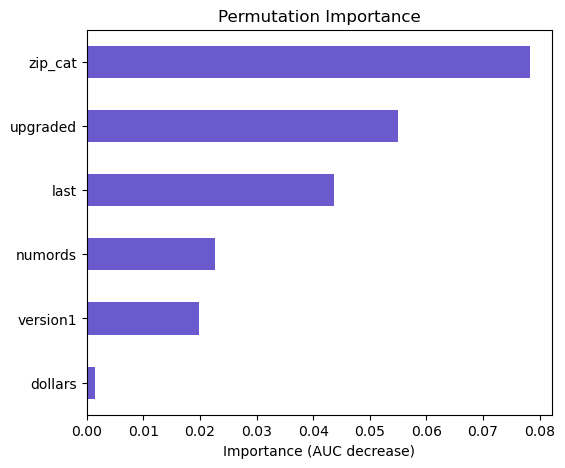

In [41]:
clf2.plot('vimp')

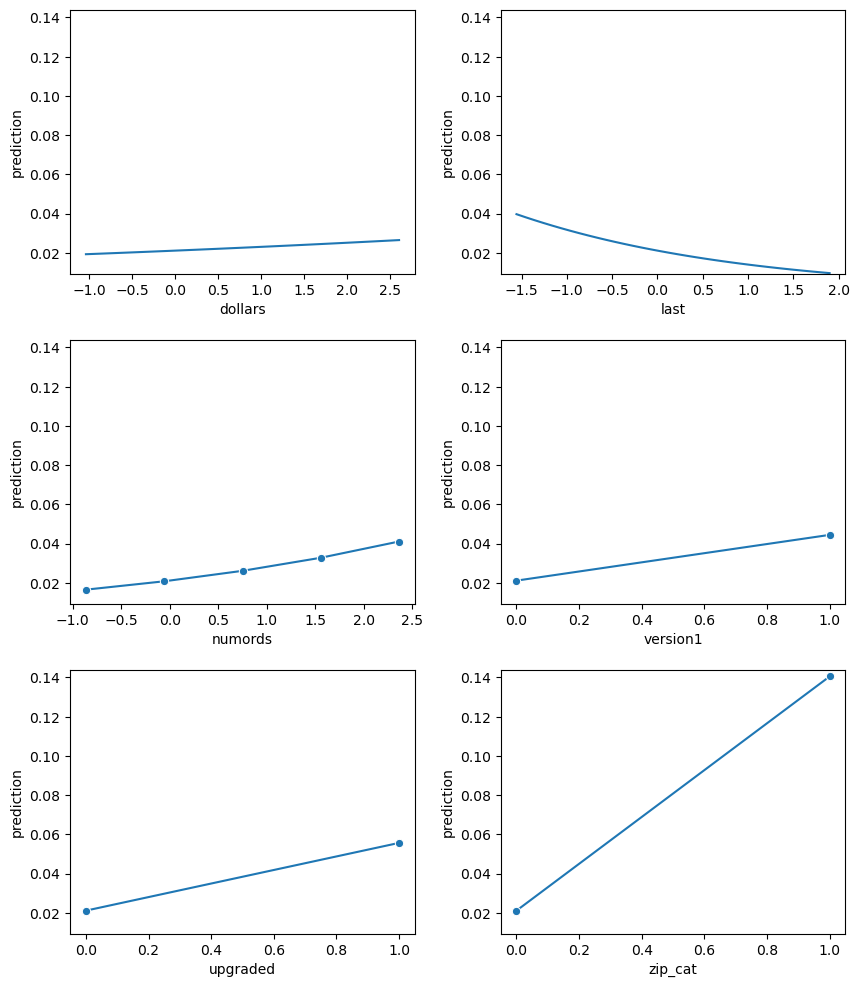

In [42]:
clf2.plot('pred')

We use the best hidden layer size we get from the grid search, and now the new neural network model has a AUC of 0.754, and the profit is 38343. Also, the most important feature is now the customer's zip codes.

In [43]:
data.head()

id   zip5  zip_bins  bizflag  numords  dollars  last  sincepurch  version1  \
0   1  94553        18        0        2    109.5     5          12         0   
1   2  53190        10        0        1     69.5     4           3         0   
2   3  37091         8        0        4     93.0    14          29         0   
3   4  02125         1        0        1     22.0    17           1         0   
4   5  60201        11        0        1     24.5     2           3         0   

   owntaxprod  ...  sex_Unknown zip_cat  prob_logit  pred_logit  prob_logit2  \
0           0  ...          0.0       0    0.033289           1     0.034740   
1           0  ...          1.0       0    0.026638           1     0.030752   
2           0  ...          0.0       0    0.088962           1     0.075625   
3           0  ...          0.0       1    0.100066           1     0.115729   
4           0  ...          0.0       0    0.027656           1     0.031901   

   pred_logit2   nn_prob  nn_pred  nn10_20_prob  nn10_20_pred  
0            1  0.030170        1      0.033594             1  
1            1  0.022664        0      0.026760             1  
2            1  0.099126        1      0.091267             1  
3            1  0.130722        1      0.100645             1  
4            1  0.024665        1      0.027764             1  

[5 rows x 25 columns]

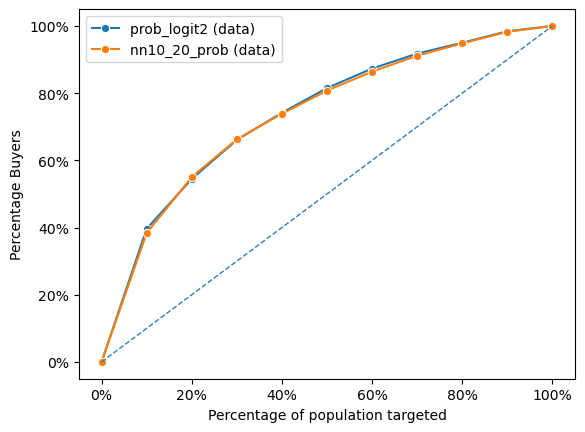

In [44]:
dct = {"data": data[data['training'] == 1]}
fig = rsm.gains_plot(dct, "res1_yes",1, pred=['prob_logit2', 'nn10_20_prob'])

## Targeting

ID list using NN

In [45]:
data['nn10_20_mail'] = np.where(data['nn10_20_prob']*0.5 > (1.41/60),1,0)
data

id   zip5  zip_bins  bizflag  numords  dollars  last  sincepurch  \
0          1  94553        18        0        2    109.5     5          12   
1          2  53190        10        0        1     69.5     4           3   
2          3  37091         8        0        4     93.0    14          29   
3          4  02125         1        0        1     22.0    17           1   
4          5  60201        11        0        1     24.5     2           3   
...      ...    ...       ...      ...      ...      ...   ...         ...   
74995  74996  28205         6        1        4    211.5     5          15   
74996  74997  94806        18        0        1      4.5    35          34   
74997  74998  72958        13        1        1     54.5     4          19   
74998  74999  29464         6        0        1     69.5    20          27   
74999  75000  32791         7        0        1     74.5     7          28   

       version1  owntaxprod  ...  zip_cat prob_logit  pred_logit  prob_logit2  \
0             0           0  ...        0   0.033289           1     0.034740   
1             0           0  ...        0   0.026638           1     0.030752   
2             0           0  ...        0   0.088962           1     0.075625   
3             0           0  ...        1   0.100066           1     0.115729   
4             0           0  ...        0   0.027656           1     0.031901   
...         ...         ...  ...      ...        ...         ...          ...   
74995         0           0  ...        0   0.057448           1     0.049279   
74996         1           0  ...        0   0.014099           0     0.009198   
74997         1           0  ...        0   0.055392           1     0.037052   
74998         0           0  ...        0   0.035416           1     0.040300   
74999         0           0  ...        0   0.061217           1     0.069664   

       pred_logit2   nn_prob  nn_pred  nn10_20_prob  nn10_20_pred  \
0                1  0.030170        1      0.033594             1   
1                1  0.022664        0      0.026760             1   
2                1  0.099126        1      0.091267             1   
3                1  0.130722        1      0.100645             1   
4                1  0.024665        1      0.027764             1   
...            ...       ...      ...           ...           ...   
74995            1  0.060086        1      0.058504             1   
74996            0  0.013748        0      0.013999             0   
74997            1  0.056332        1      0.055097             1   
74998            1  0.033652        1      0.035941             1   
74999            1  0.063625        1      0.062125             1   

       nn10_20_mail  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  
...             ...  
74995             1  
74996             0  
74997             1  
74998             0  
74999             1  

[75000 rows x 26 columns]

In [46]:
sum(data['pred_logit2'] != data['nn10_20_pred'])

5643

In [47]:
test = data[data['training']==0]
test['res1_yes'].value_counts()

res1_yes
0    21397
1     1103
Name: count, dtype: int64

In [48]:
test['mailto_wave2'] = np.where((test['nn10_20_mail'] == 1) & (test['res1_yes']==0), True, False)
id_list_nn = test[['id', 'mailto_wave2']]
id_list_nn['mailto_wave2'].value_counts()

/tmp/ipykernel_7863/3344075747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['mailto_wave2'] = np.where((test['nn10_20_mail'] == 1) & (test['res1_yes']==0), True, False)


mailto_wave2
False    16252
True      6248
Name: count, dtype: int64

In [49]:
id_list_nn.to_csv('Sameen_Divyamsi_Mengjie_Minqi.csv',index=False)

In [50]:
number_sent = data[data['training'] == 0]['nn10_20_pred'].sum()
test_response_rate = data[(data['training'] == 0) & (data['nn10_20_pred'] == 1)]['res1_yes'].sum() / number_sent
number_sent_total = test[test['mailto_wave2'] == True].shape[0] * (801821/22500)
print("number_sent: ", number_sent_total)
cost = number_sent_total * 1.41
print("cost: ", cost)
print("test set response rate: ", test_response_rate)
revenue = 801821 * test_response_rate * 0.5 * 60
print("revenue: ", revenue)
profit = revenue - cost
print("profit: ", profit)
target_rate = number_sent_total / 801821
print("target_rate: ", target_rate)

number_sent:  222656.7825777778
cost:  313946.06343466666
test set response rate:  0.06737857388908026
revenue:  1620766.6648294867
profit:  1306820.60139482
target_rate:  0.27768888888888893


# Generative AI: 


Out Group used GenAI (ChatGPT) for multiple purposes to understand code and concepts: Here is how:

1. Understanding about GridSearchCV and to use it for hyperparameter Tuning: 

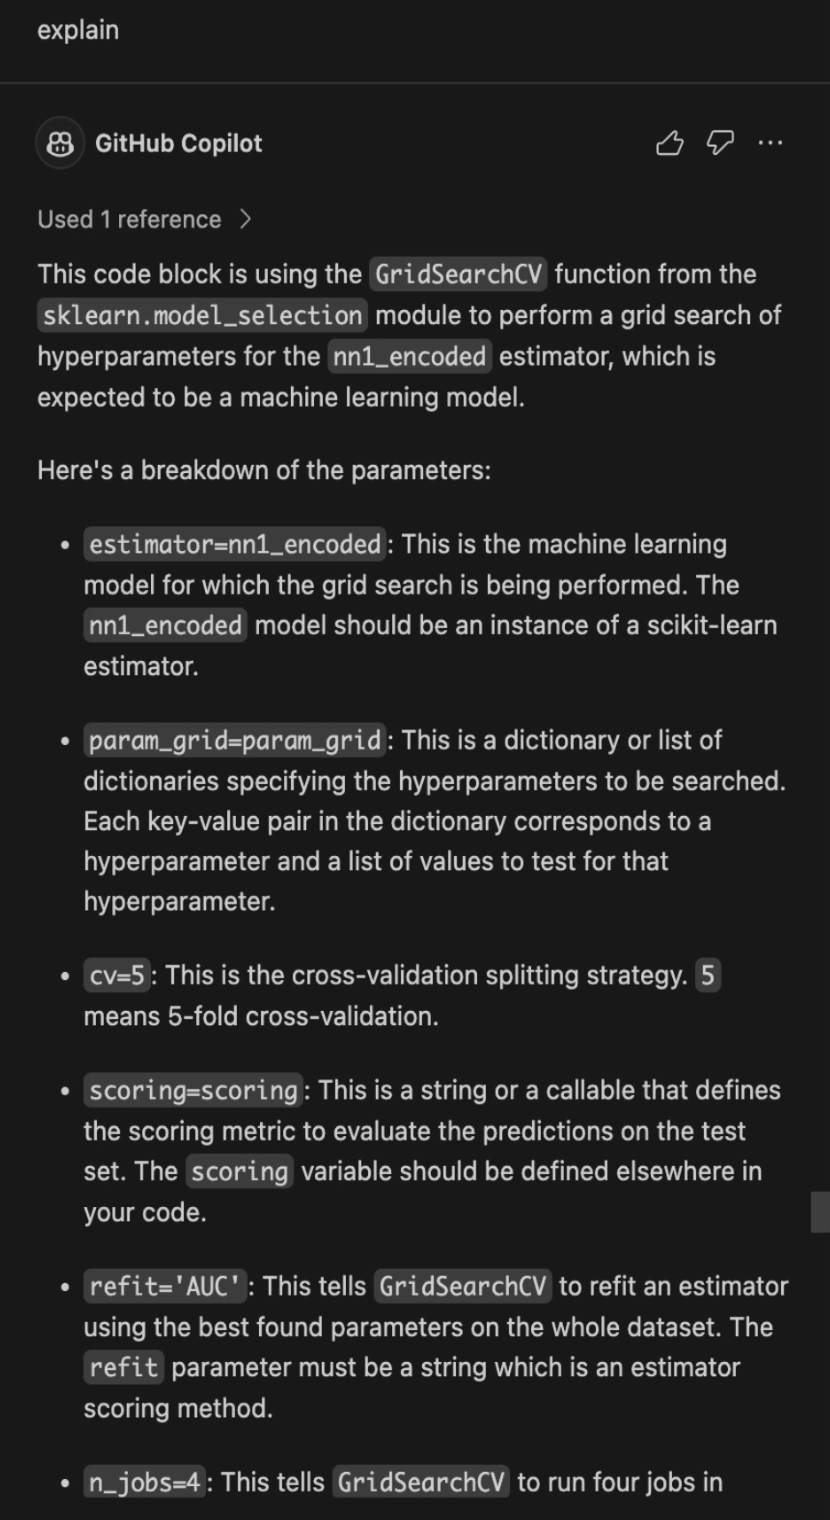

2. To use nested loops (code for that):

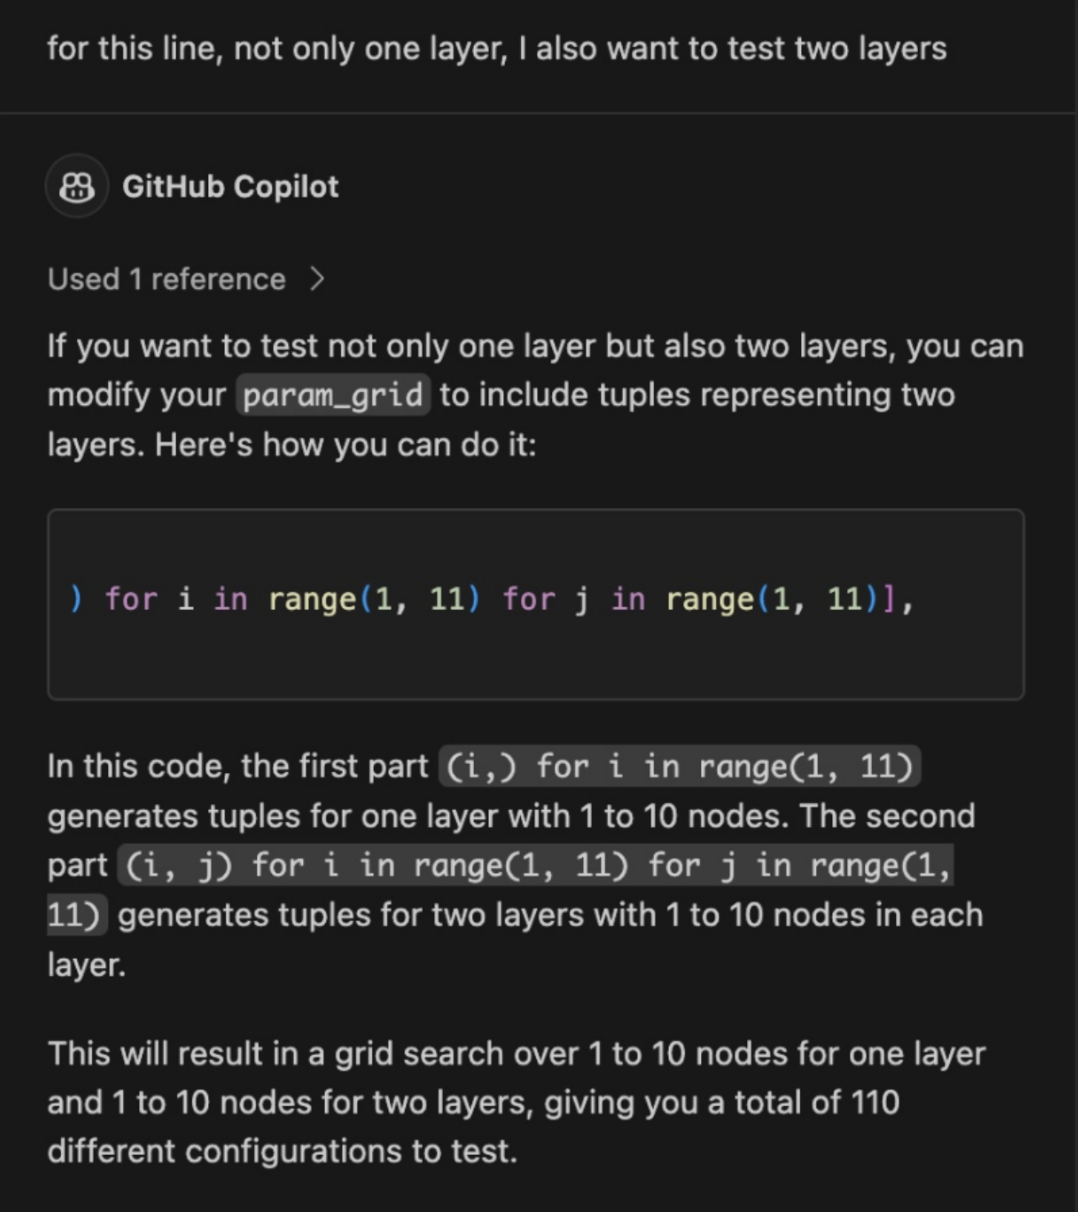

3. Clarity about Classification or Regression problem for our model:

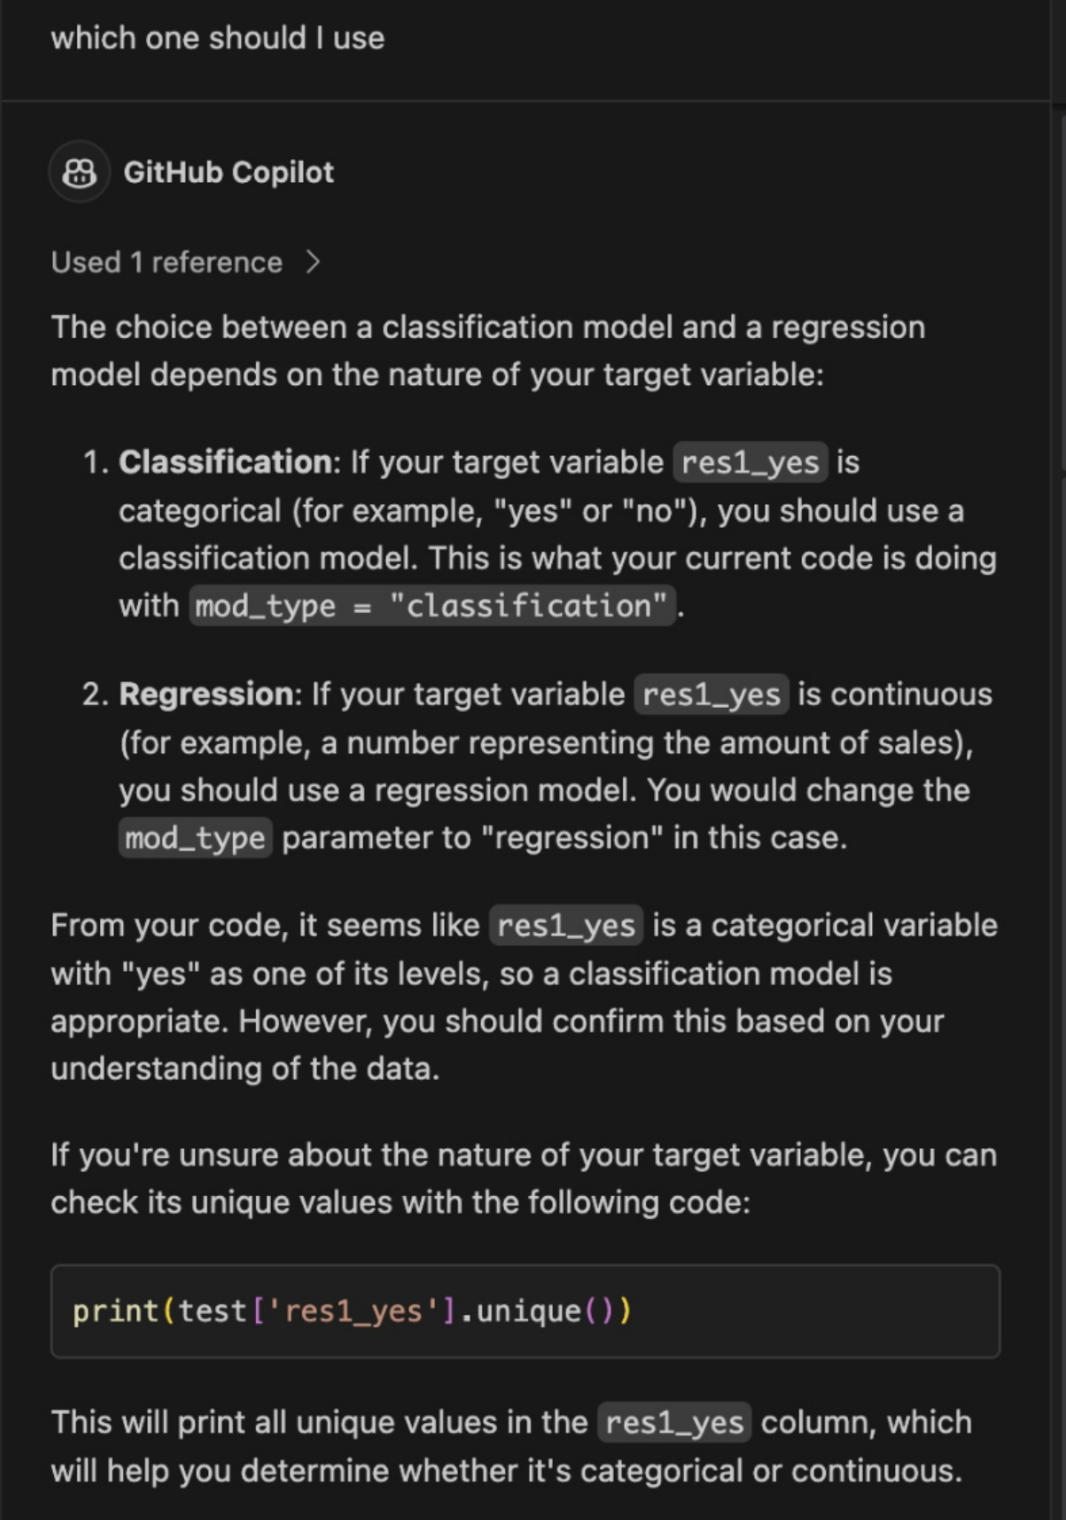

4. Understanding Pyrsm package parameters:

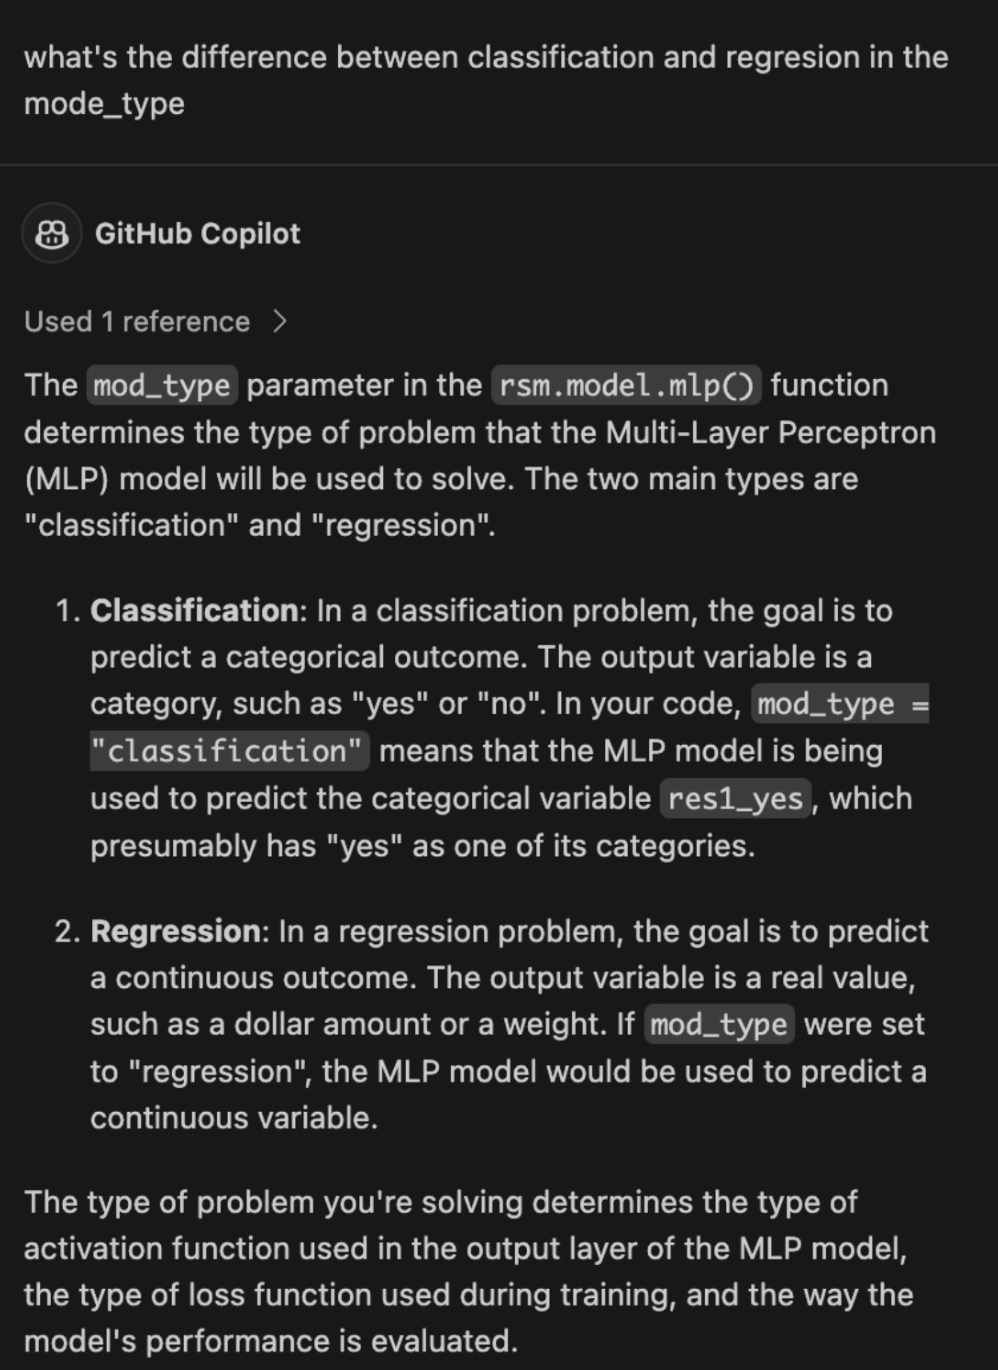

5. Code for changing variable types: 

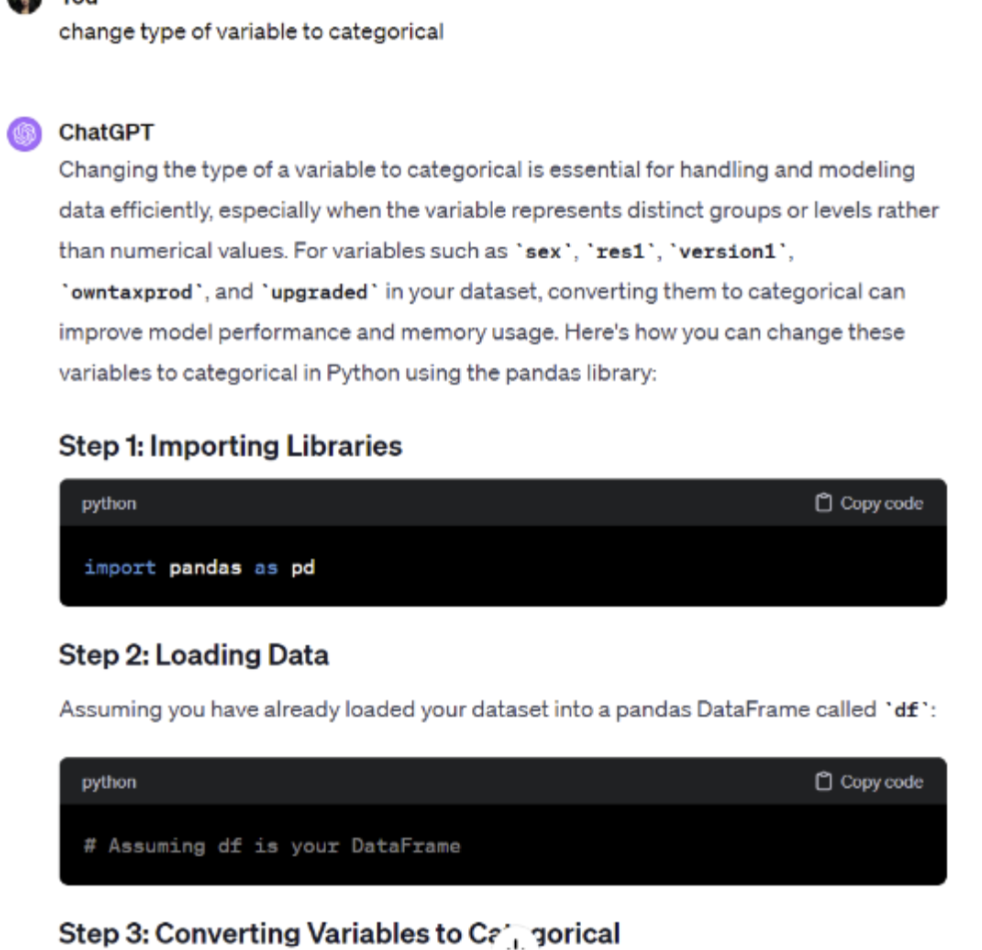

6. Code to perform Standard Scalar Operations: 

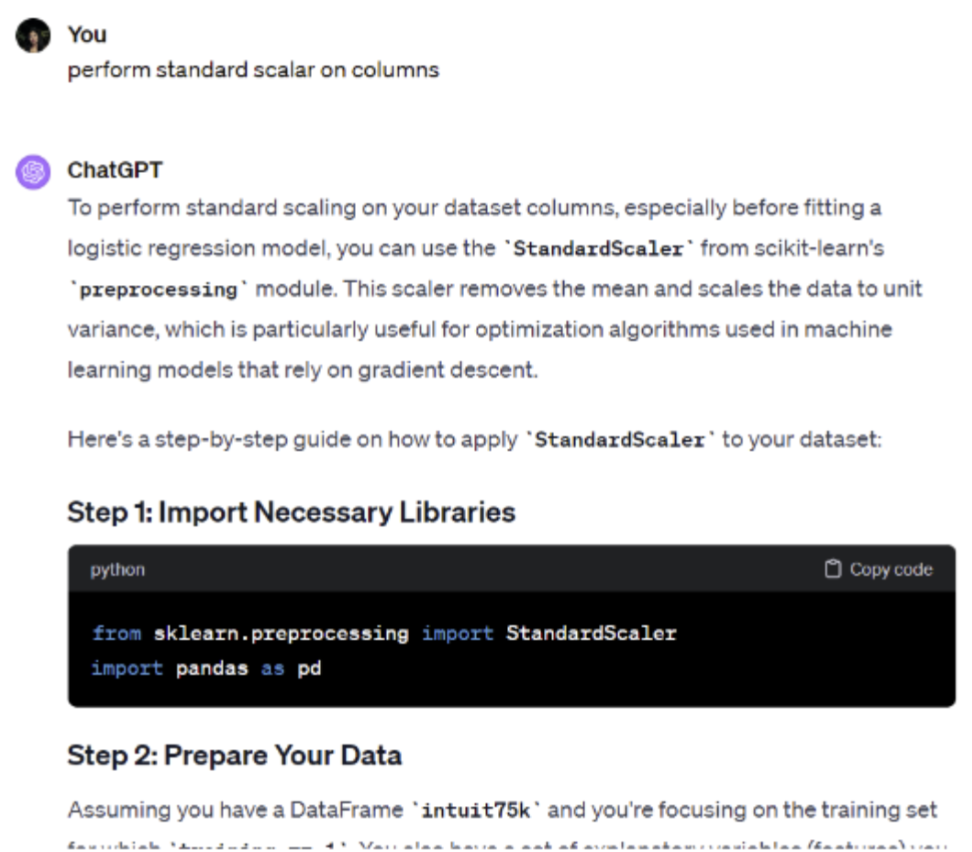

7. Code for setting the level of dummy variables during one hot encoding:

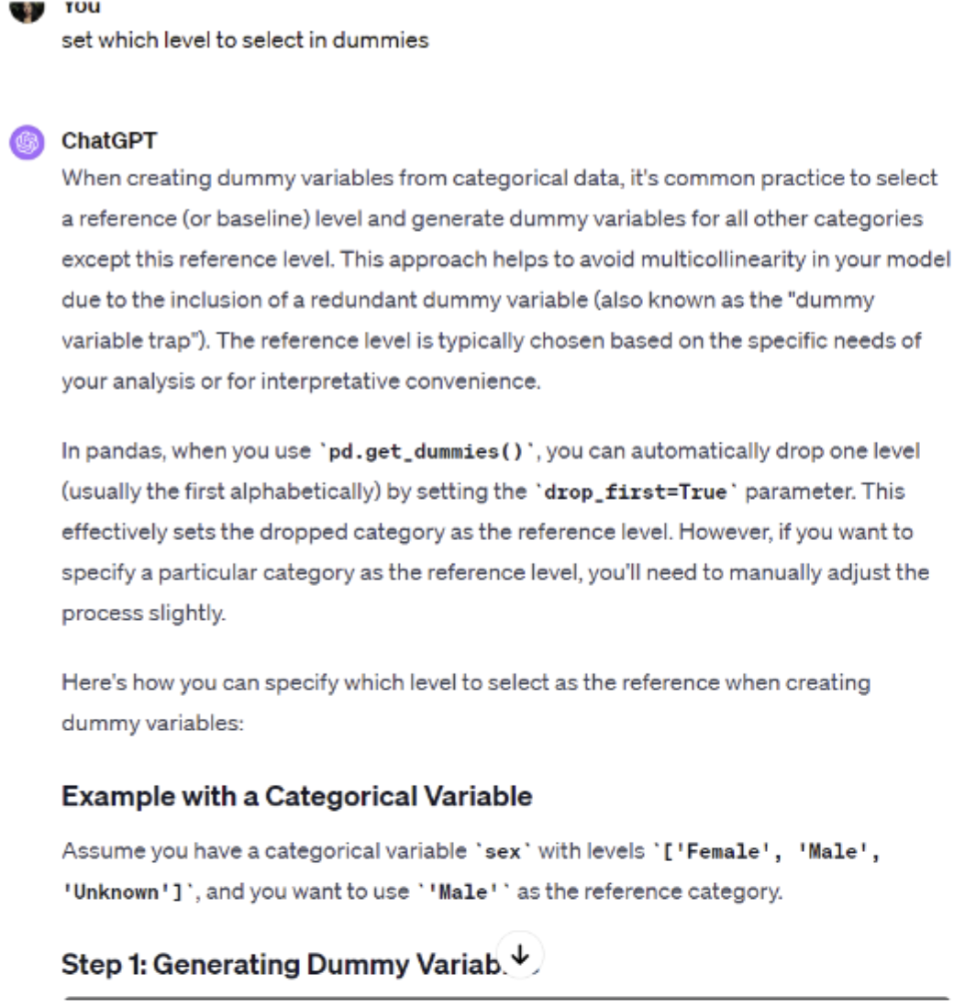

8. Understanding different types of solvers and their Use cases:


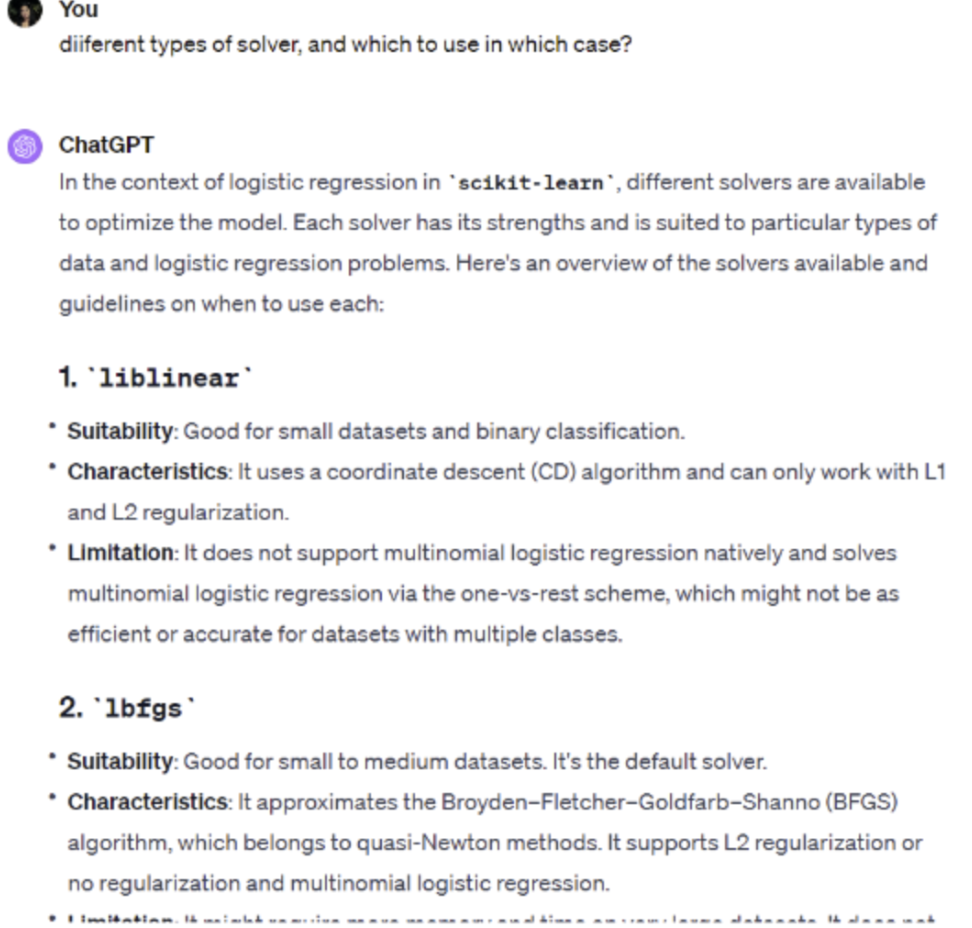

